# Capítulo 7. Aprendizaje en Conjunto y Random Forest

## Aprendizaje en Conjunto y Random Forest — Qué son y para qué sirven

---

## 1. Clasificador de Votaciones (Voting Classifier)
**Qué es:**  
Un modelo de conjunto que combina varios clasificadores y toma la decisión final mediante votación (mayoría o promedio de probabilidades).

**Para qué sirve:**  
- Mejorar el rendimiento al combinar diferentes modelos.  
- Reducir variabilidad y errores individuales.  
- Aumentar robustez en comparación con un solo clasificador.

---

## 2. Bagging y Pasting
**Qué es:**  
Técnicas de entrenamiento en conjunto que crean múltiples modelos entrenados en subconjuntos de datos:
- **Bagging:** muestreo con reemplazo.  
- **Pasting:** muestreo sin reemplazo.

**Para qué sirve:**  
- Reducir la varianza del modelo.  
- Entrenar modelos independientes que mejoran el rendimiento conjunto.  
- Especialmente útil con modelos inestables como árboles de decisión.

---

### 2.1 Evaluación Out-of-Bag (OOB)
**Qué es:**  
Una forma de validar un modelo tipo bagging usando las muestras que quedaron fuera de cada bootstrap.

**Para qué sirve:**  
- Obtener una evaluación del rendimiento sin usar un conjunto de validación adicional.  
- Mejorar la eficiencia en datasets pequeños.

---

## 3. Random Subspace
**Qué es:**  
Una técnica que entrena cada estimador usando solo un subconjunto aleatorio de **características**.

**Para qué sirve:**  
- Reducir correlación entre modelos.  
- Mejorar estabilidad del conjunto.  
- Útil cuando hay muchas características.

---

## 4. Random Forest
**Qué es:**  
Un modelo de conjunto basado en muchos árboles de decisión entrenados mediante bagging y selección aleatoria de características.

**Para qué sirve:**  
- Lograr alta precisión con bajo sobreajuste.  
- Manejar datos con muchas variables y relaciones complejas.  
- Proveer medidas de importancia de características.

---

### 4.1 Predictores
**Qué es:**  
Los árboles individuales que componen el Random Forest, cada uno entrenado con diferentes muestras y subconjuntos de características.

**Para qué sirve:**  
- Aportar diversidad al bosque.  
- Reducir el riesgo de que el modelo se sobreajuste.

---

## 5. Boosting
**Qué es:**  
Un método de conjunto que entrena modelos secuencialmente, donde cada nuevo modelo corrige los errores del anterior.

**Para qué sirve:**  
- Crear conjuntos fuertes a partir de modelos débiles.  
- Mejorar la precisión en tareas complejas.  
- Adaptarse a patrones difíciles de capturar.

---

### 5.1 AdaBoost
**Qué es:**  
Un algoritmo de boosting que ajusta el peso de cada ejemplo según si fue clasificado correctamente.

**Para qué sirve:**  
- Enfocar el entrenamiento en los ejemplos más difíciles.  
- Crear modelos precisos con clasificadores débiles.

---

### 5.2 Boosting con Gradiente (Gradient Boosting)
**Qué es:**  
Un método que construye modelos secuenciales ajustándose al gradiente del error.

**Para qué sirve:**  
- Resolver tanto regresión como clasificación.  
- Capturar relaciones altamente no lineales.  
- Ser una base de modelos muy potentes como XGBoost, LightGBM y CatBoost.

---

## 6. Stacking
**Qué es:**  
Una técnica donde varios modelos base generan predicciones que luego alimentan a un modelo final (meta-modelo).

**Para qué sirve:**  
- Combinar modelos heterogéneos de manera más flexible que el voting o bagging.  
- Aprovechar fortalezas individuales para mejorar el rendimiento global.  


## <span style="color:green">1.Clasificador de Votaciones </span>

In [1]:
#Importa las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
#Importa los clasificadores
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
#Este no lo conocían, se los presento
#Este VotingClassifier va a recibir los modelos y va a contar los votos de los resultados
from sklearn.ensemble import VotingClassifier  

In [3]:
#Trae el set de datos
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
             }
#Es sencillo pero, es trabajo honesto
df = pd.DataFrame(candidates, columns = ['gmat', 'gpa', 'work_experience', 'admitted'])
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


In [4]:
#Dividir el dataframe en dos: los datos a predecir y los datos predichos
x = df[['gmat', 'gpa', 'work_experience']]
y = df['admitted']

In [5]:
#Importa el train_test_split
from sklearn.model_selection import train_test_split
#Divide los datos
x_train, x_test, y_train, y_test = train_test_split(x, y,shuffle=True, test_size=0.3, random_state=0)

In [6]:
#Entrena los modelos
    #Genera los objetos
svm = SVC()
    #Establece una profundidad máxima de 2 en el árbol de decisión
arbol = DecisionTreeClassifier(max_depth=2)

In [7]:
#Genera un objeto para el votingClassifier
votes = VotingClassifier(estimators=[('svm', svm), ('arbol', arbol)], voting='hard')
votes.fit(x_train, y_train)

,estimators,"[('svm', ...), ('arbol', ...)]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0


En caso de querer una votación suave, poner en voting="Soft" (más adelante se ejemplifica)

In [8]:
#Calcular la exactitud de los modelos con accuracy_score
from sklearn.metrics import accuracy_score
#Ciclar a tráves de los 3 modelos que estamos desarrolando 
for i in (svm, arbol, votes):
    #Ajustar
    i.fit(x_train, y_train)
    #Predecir los datos del x_test 
    y_predict = i.predict(x_test)
        #Arrojar el puntaje de exactitud del modelo
    print(f'El modelo {i.__class__.__name__} tiene una exactitud de: {accuracy_score(y_test, y_predict)}')

El modelo SVC tiene una exactitud de: 0.6666666666666666
El modelo DecisionTreeClassifier tiene una exactitud de: 0.9166666666666666
El modelo VotingClassifier tiene una exactitud de: 0.6666666666666666


In [9]:
#En caso de querer un margen suave se tiene que hacer ciertas modificaciones
svm = SVC(probability=True)
votes = VotingClassifier(estimators=[('svm', svm), ('arbol', arbol)], voting='soft')
votes.fit(x_train, y_train)
#Calcular la exactitud de los modelos con accuracy_score
from sklearn.metrics import accuracy_score
#Ciclar a tráves de los 3 modelos que estamos desarrolando 
for i in (svm, arbol, votes):
    #Ajustar
    i.fit(x_train,y_train)
    #Predecir los datos del x_test 
    y_pred = i.predict(x_test)
    print(i.__class__.__name__,
        #Arrojar el puntaje de exactitud 
         accuracy_score(y_test,y_pred))

SVC 0.6666666666666666
DecisionTreeClassifier 0.9166666666666666
VotingClassifier 0.8333333333333334


***

## <span style="color:green">2. Bagging y Pasting </span>

In [10]:
# Importar el clasificador BaggingClassifier
from sklearn.ensemble import BaggingClassifier
#Genera el objeto a raíz de un árbol de decisión (puede ser el que quieran)
bag = BaggingClassifier(DecisionTreeClassifier(),  
                           #cantidad de (en este caso) árboles de decisión 
                            n_estimators=100,
                            #La cantidad de datos que tomará de una muestra
                            max_samples=0.8,
                           #Bagging=True; Pasting=False
                            bootstrap=True)
bag.fit(x_train, y_train)
y_pred = bag.predict(x_test)
#Aunque dará un puntaje similar al clasificador de votaciones, esto se debe al set de datos pequeño.
print('BaggingClassifier', accuracy_score(y_test, y_pred))

BaggingClassifier 0.8333333333333334


In [11]:
#Hacer el ejemplo con pasting pero utilizar ahora SVC
from sklearn.ensemble import BaggingClassifier
pasting_bag = BaggingClassifier(SVC(),
                            n_estimators=100,
                            max_samples=10,
                            bootstrap=False)
pasting_bag.fit(x_train, y_train)
y_pred = pasting_bag.predict(x_test)
print('BaggingClassifier para SVC', accuracy_score(y_test, y_pred))

BaggingClassifier para SVC 0.6666666666666666


Pasting no suele ser utilizado en ejemplos reales. El puntaje de exactitud evidencia que es un pésimo modelo

***

### <span style="color:blue">2.1 Evaluación Out-of-Bag  </span>

In [12]:
#Importar BaggingClassifier
from sklearn.ensemble import BaggingClassifier
bag_arbol_oob = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=100,
                            max_samples=8,
                            bootstrap=True,
                            oob_score=True)
                            #Poner oob_score=True para poder hacer la evaluación
        
#Ajustar
bag_arbol_oob.fit(x_train, y_train)
#Visualiza el puntaje OOB
print('OOB score para BaggingClassifier con árbol de decisión:', bag_arbol_oob.oob_score_)

OOB score para BaggingClassifier con árbol de decisión: 0.8571428571428571


Este puntaje es un parámetro extra, puedes concluir si hay o no un ajuste con base a los parámetros que ya sacaste y el puntaje OOB.

***

## <span style="color:green">3. Random Subspace </span>

In [13]:
#Hacer un Bagging como los anteriores (lo mismo de antes)
bagging = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=100,
                            max_samples=8,
                            max_features=2,
                            oob_score=True,
                            bootstrap=True)

                            #Max_features le dice que solo tomará 2 variables
                       
#Ajustar
bagging.fit(x_train, y_train)

,estimator,DecisionTreeClassifier()
,n_estimators,100
,max_samples,8
,max_features,2
,bootstrap,True
,bootstrap_features,False
,oob_score,True
,warm_start,False
,n_jobs,None
,random_state,None
,verbose,0


In [14]:
#Visualizar el puntaje de exactitud, (lo mismo de antes)
bagging.fit(x_train, y_train)
y_pred = bagging.predict(x_test)
accuracy_score(y_test, y_pred)

0.8333333333333334

## <span style="color:green">4. Random Forest </span>

In [15]:
#Importar RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
#Hacer RandomForestClassifier, establecer los parámetros similares al bagging
randfor = RandomForestClassifier(n_estimators=100,
                            max_leaf_nodes=8,
                            max_features=2,
                            )
             

In [16]:
#Hacer el ajuste
randfor.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,2
,max_leaf_nodes,8
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
#Hacer las predicciones
predic_y = randfor.predict(x_test)

In [18]:
#Visualiza el puntaje 
accuracy_score(y_test, predic_y)

0.8333333333333334

En el futuro, no les pedirán bagging, se prefiere utilizar Random Forest

### <span style="color:blue">4.1 Predictores </span>

In [19]:
#Realiza el árbol de manera aleatoria
rand = RandomForestClassifier(n_estimators=100)
#Despliega los parámetros importantes o predictores
rand.fit(x_train, y_train)
for i, feature in zip(x.columns,rand.feature_importances_):
    print(i,feature)

gmat 0.33093327544210416
gpa 0.39168886848836026
work_experience 0.27737785606953563


El valor que arroja en cada variable es equivalente al nivel de importancia de la misma. En este caso el **gpa** es la variable que tiene mayor peso en la decisión

## <span style="color:green">5. Boosting </span>

### <span style="color:blue">5.1 Adaboost </span>

In [20]:
#Importar AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
#Crear objeto de Adaboost con árboles de decisiones  
adaboost = AdaBoostClassifier(DecisionTreeClassifier(),
                           n_estimators=100,
                           learning_rate=1)
adaboost.fit(x_train, y_train)

,estimator,DecisionTreeClassifier()
,n_estimators,100
,learning_rate,1
,algorithm,'deprecated'
,random_state,None
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [21]:
#Calcular el puntaje de exactitud para adaboost
y_predict = adaboost.predict(x_test)
accuracy_score(y_test, y_predict)

0.8333333333333334

### <span style="color:blue">5.2 Boosting con Gradiente </span>

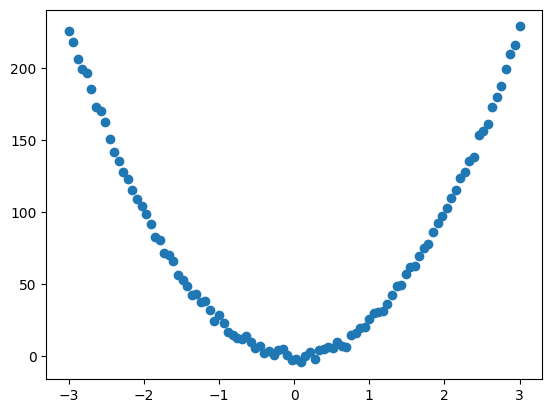

In [22]:
#Crear un set de datos, especificamente una parábola para una mejor visualización 
m = 100
x = np.linspace(-3, 3, m)
y = 25*x**2 + np.random.randn(m) * 2.5
plt.scatter(x, y)

In [23]:
#Crear el primer predictor, utiliza árboles de decisiones y regularizalo con un max_depth=2
from sklearn.tree import DecisionTreeRegressor
x = x.reshape(-1, 1)
arbol_reg = DecisionTreeRegressor(max_depth=2)
arbol_reg.fit(x, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [24]:
#Calcular los errores residuales que 
#son la diferencia entre las predicciones del modelo y el valor de la variable a predecir
y2 = y - arbol_reg.predict(x)


In [25]:
#crear el segundo predictor en base a esos residuales.
segundo_arbol = DecisionTreeRegressor(max_depth=2)
segundo_arbol.fit(x, y2)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [26]:
#Visualizar que sucede si sumamos las predicciones del primer predictor con el segundo
y_pred = (arbol_reg.predict(x) + segundo_arbol.predict(x) for arbol in [arbol_reg, segundo_arbol])

In [27]:
#Repetir el mismo procedimiento para crear el árbol 3.
y3 = y - segundo_arbol.predict(x)
tercer_arbol = DecisionTreeRegressor(max_depth=2)
tercer_arbol.fit(x, y3)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [28]:
#Ahora vamos a ver que sucede si sumamos los 3 árboles
y_pred = (arbol_reg.predict(x) + segundo_arbol.predict(x) + tercer_arbol.predict(x) for arbol in [arbol_reg, segundo_arbol, tercer_arbol])

In [29]:
#Crear exactamente el mismo modelo que creamos antes
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbr.fit(x, y)

,loss,'squared_error'
,learning_rate,1.0
,n_estimators,3
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,2
,min_impurity_decrease,0.0
,init,None


In [30]:
#En este caso utilizaremos el error medio cuadrado.
from sklearn.metrics import mean_squared_error
x_train,x_test,y_train,y_test = train_test_split(x,y)

gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100)
gbr.fit(x_train, y_train)

err = [mean_squared_error(y_test, y_pred) for y_pred in gbr.staged_predict(x_test)]
best_n_estimators = np.argmin(err)
print("El número óptimo de estimadores es:", best_n_estimators)

El número óptimo de estimadores es: 99


En este caso el mejor caso es en **56** de los 120 árboles que probamos por lo que deberíamos crear nuestro modelo con 56 árboles de decisión.

In [ ]:
#%pip install xgboost
#import sys
#print(sys.executable)

#Evaluar el early stopping automáticamente con XGBRegressor
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=1000)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)


In [36]:
# Se crea un modelo de regresión XGBoost con early_stopping_rounds=1
xgbr = XGBRegressor(n_estimators=1000, early_stopping_rounds=1)
# Se entrena el modelo con los datos de entrenamiento (x_train, y_train)
xgbr.fit(x_train, y_train, eval_set=[(x_test, y_test)], verbose=False)
# Se usa el conjunto de prueba para evaluar el rendimiento durante el entrenamiento
# Se desactivan los mensajes de progreso durante el entrenamiento
# Se utiliza el modelo entrenado para hacer predicciones sobre el conjunto de prueba
y_predict = xgbr.predict(x_test)

## <span style="color:green">6. Stacking </span>

In [37]:
#Importa los regresores necesarios StackingRegressor,LinearRegression, RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Generar arbol de decision
arbok = DecisionTreeRegressor() # no, no el pokemon
#Generar la regresión lineal
linear = LinearRegression() 
#Generar el bosque aleatorio
bosquecito = RandomForestRegressor()

#Genera los tres modelos 
stacks = StackingRegressor(estimators=[('arbol', arbok), 
                                       ('lineal', linear), 
                                       ('bosque', bosquecito)])
#Utiliza Stacking
stacks.fit(x_train, y_train)

,estimators,"[('arbol', ...), ('lineal', ...), ...]"
,final_estimator,None
,cv,None
,n_jobs,None
,passthrough,False
,verbose,0
,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
